In [1]:
print('通过微调进行迁移学习.。')



通过微调进行迁移学习.。


In [2]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

from torchvision import models
from torchvision import transforms as tfs
from torchvision.datasets import ImageFolder


In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline



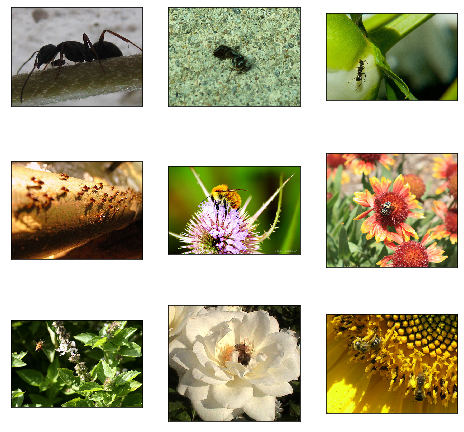

In [4]:
# 读取部分数据
root_path = '../data/hymenoptera_data/train/'
im_list = [os.path.join(root_path, 'ants', i) for i in os.listdir(root_path+'ants')[:4]]
im_list += [os.path.join(root_path, 'bees', i) for i in os.listdir(root_path+'bees')[:5]]

nrows = 3
ncols = 3
figsize = (8,8)

_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(Image.open(im_list[nrows*i+j]))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

In [5]:
len(im_list)

9

In [12]:
# 定义数据预处理
train_tf = tfs.Compose([
    tfs.RandomResizedCrop(224),
    tfs.RandomHorizontalFlip(),
    tfs.ToTensor(),
    tfs.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

valid_tf = tfs.Compose([
    tfs.Resize(256),
    tfs.CenterCrop(224),
    tfs.ToTensor(),
    tfs.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



In [13]:
# 使用IamgeFolder 定义数据集
train_set = ImageFolder('../data/hymenoptera_data/train/', train_tf)
valid_set = ImageFolder('../data/hymenoptera_data/val/', valid_tf)
# 使用 DataLoadr 定义迭代器
train_data = DataLoader(train_set, 16, True, num_workers=4)
valid_data = DataLoader(valid_set, 16, False, num_workers=4)

In [14]:
# 使用预训练模型
net = models.resnet50(pretrained=True)
# print(net)

In [15]:
print(net.conv1.weight.shape)


torch.Size([64, 3, 7, 7])


In [16]:
# 将最后的全连接层改成二分类
net.fc = nn.Linear(2048, 2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, weight_decay=1e-4)



In [18]:
from C5_CNN.utils import train
train(net, train_data, valid_data, 20, optimizer, criterion)



Epoch 0. Train Loss: 0.056821, Train Acc: 0.984375, Valid Loss: 0.148840, Valid Acc: 0.938889, Time 00:00:04
Epoch 1. Train Loss: 0.109857, Train Acc: 0.949219, Valid Loss: 0.173893, Valid Acc: 0.932639, Time 00:00:05
Epoch 2. Train Loss: 0.128192, Train Acc: 0.933594, Valid Loss: 0.250347, Valid Acc: 0.920139, Time 00:00:05
Epoch 3. Train Loss: 0.052714, Train Acc: 0.980469, Valid Loss: 0.138185, Valid Acc: 0.963889, Time 00:00:05
Epoch 4. Train Loss: 0.078882, Train Acc: 0.968750, Valid Loss: 0.141146, Valid Acc: 0.951389, Time 00:00:05
Epoch 5. Train Loss: 0.111105, Train Acc: 0.945312, Valid Loss: 0.572547, Valid Acc: 0.856250, Time 00:00:05
Epoch 6. Train Loss: 0.140807, Train Acc: 0.945312, Valid Loss: 0.288903, Valid Acc: 0.896528, Time 00:00:05
Epoch 7. Train Loss: 0.060252, Train Acc: 0.984375, Valid Loss: 0.165825, Valid Acc: 0.938889, Time 00:00:05
Epoch 8. Train Loss: 0.083966, Train Acc: 0.972656, Valid Loss: 0.167192, Valid Acc: 0.938889, Time 00:00:06
Epoch 9. Train Loss